# PCA


$ X=(x_1,x_2,...,x_p), X \in R^p$

Busco combinaciones lineales $q<p$  
$z_1=\gamma_1^T.X,z_2=\gamma_2^T.X,z_3=\gamma_3^T.X,...,Z_q=\gamma_q^T.X -> Z=(z_1,z_2,...,z_q)$  
Tal que expliquen una porción razonable de la variabilidad de $X$ medida a través de la $Tr(\Sigma)$.  
Minimiza los cuadrados mínimos de Pearson.

## Algunas definiciones

$X=(x_1,,x_2,...,x_p) \in R^p, E(x)=\mu \in R^p, Var(x)=\Sigma $

Sean:

* $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_p$ los autovalores de $\Sigma$
* $\gamma_1,...,\gamma_p$ los autovectores de $\Sigma$ asociada a $\lambda_1,...,\lambda_p$
* $\Gamma=(\gamma_1,...,\gamma_p)$, $\Gamma \Gamma^T=I_p, \Lambda=diag(\gamma_1,...,\gamma_p)$

Puedo escribir a x como:

$x=\mu+\sum_{i=1}^p\gamma_i^T (x-\mu) \gamma_i$

$v_i=\gamma_i^T (x-\mu)$ se la llama iésima componente principal.

$ 
   v= \Gamma^T(x-\mu)=
  \left( {\begin{array}{c}
   \gamma_1^T (x-\mu) \\
   \gamma_2^T (x-\mu) \\
   .\\
   .\\
   .\\
   \gamma_p^T (x-\mu) \\
  \end{array} } \right)
  = 
  \left( {\begin{array}{c}
   v_1 \\
   v_2 \\
   .\\
   .\\
   .\\
   v_p\\
  \end{array} } \right)
$

$Var(v)= Var(\Gamma^T(x-\mu))=\Gamma^T \Sigma \Gamma = \Lambda$  
$E(v)=E(\Gamma^T(x-\mu))=\Gamma^T E(x-\mu) = 0$ porque $E(x-\mu)=0$

Componentes Principales estandarizados $Z_i=\frac{v_i}{\sqrt{\lambda_i}}= \frac{\gamma_i^T (x-\mu)}{\sqrt{\lambda_i}} $

En el caso de que X tenga distribución gaussiana multivariada, las componentes de Z son independientes.  
Quiero estudiar $corr(x_i,v_j)$  

$corr(x_i,v_j)=\frac{cov(x_i,v_j)}{\sqrt{Var(x_i)Var(v_j)}}$ donde $Var(x_i)=\sigma_{ii}, Var(v_j)=\sigma{}\lambda_j$
$Cov(x,v)=cov(X,\Gamma^T(x-\mu))+cov(X,\Gamma^T.X)+cov(x,\Gamma(-\mu))=\Sigma.\Gamma=\Gamma.\Lambda$  

Por lo tanto:

$cov(x_i,v_j)=(\Gamma \Lambda)_{ij}=\gamma_{ji}.\lambda_j$  
$corr(x_i,v_j)=\frac{cov(x_i,v_j)}{\sqrt{Var(x_i)Var(v_j)}}=\gamma_{ji}.\sqrt{\frac{\lambda_k}{\sigma_{ii}}}$ 

## Propiedades de optimalidad

Lema: Sea $\Sigma \in R^{pxp}$ no negativa y simétrica, $\lambda_1 \geq ... \geq \lambda_p$ autovalores y $\gamma_1....,\gamma_p$ autovectores asociados, entonces:  

1) $Sup(u!=0)\frac{u^T\Sigma u}{\norm{u}^2}=\lambda_1$ y se alcanza en $\gamma_1$  
2) $Inf(u!=0)\frac{u^T\Sigma u}{\norm{u}^2}=\lambda_p$ y se alcanza en $\gamma_p$
3) $Sup(u!=0, u^T \lambda_i=0, 1 \leq k)=\frac{u^T\Sigma u}{\norm{u}^2}=\lambda_{k+1}$ y se alcanza en $\gamma_{k+1}$

### Propiedad

$x \in R^p, E(x)=0 $, $Var(x)=\Sigma$

In [4]:
library(MASS)
library("Flury")
data("microtus")
mydata <- microtus

In [69]:
head(mydata)

Group,M1Left,M2Left,M3Left,Foramen,Pbone,Length,Height,Rostrum
multiplex,2078,1649,1708,3868,5463,2355,805,475
multiplex,1929,1551,1550,3825,4741,2305,760,450
multiplex,1888,1613,1674,4440,4807,2388,775,460
multiplex,2020,1670,1829,3800,4974,2370,766,460
multiplex,2223,1814,1933,4222,5460,2470,815,475
multiplex,2190,1800,2066,4662,4860,2535,838,521


In [70]:
summary(mydata)

          Group         M1Left         M2Left         M3Left        Foramen    
 multiplex   : 43   Min.   :1534   Min.   :1355   Min.   :1361   Min.   :3155  
 subterraneus: 46   1st Qu.:1783   1st Qu.:1503   1st Qu.:1595   1st Qu.:3751  
 unknown     :199   Median :1923   Median :1570   Median :1724   Median :3932  
                    Mean   :1935   Mean   :1589   Mean   :1727   Mean   :3913  
                    3rd Qu.:2074   3rd Qu.:1660   3rd Qu.:1856   3rd Qu.:4080  
                    Max.   :2479   Max.   :1880   Max.   :2187   Max.   :4662  
     Pbone          Length         Height         Rostrum     
 Min.   :3928   Min.   :1908   Min.   :700.0   Min.   :375.0  
 1st Qu.:4815   1st Qu.:2227   1st Qu.:759.2   1st Qu.:425.0  
 Median :5079   Median :2312   Median :789.0   Median :450.0  
 Mean   :5082   Mean   :2309   Mean   :790.8   Mean   :451.2  
 3rd Qu.:5328   3rd Qu.:2388   3rd Qu.:817.8   3rd Qu.:475.0  
 Max.   :6104   Max.   :2605   Max.   :912.0   Max.   :545.0  

In [71]:
mydata_aux=mydata[1:43,]
mydata_aux$Group=NULL

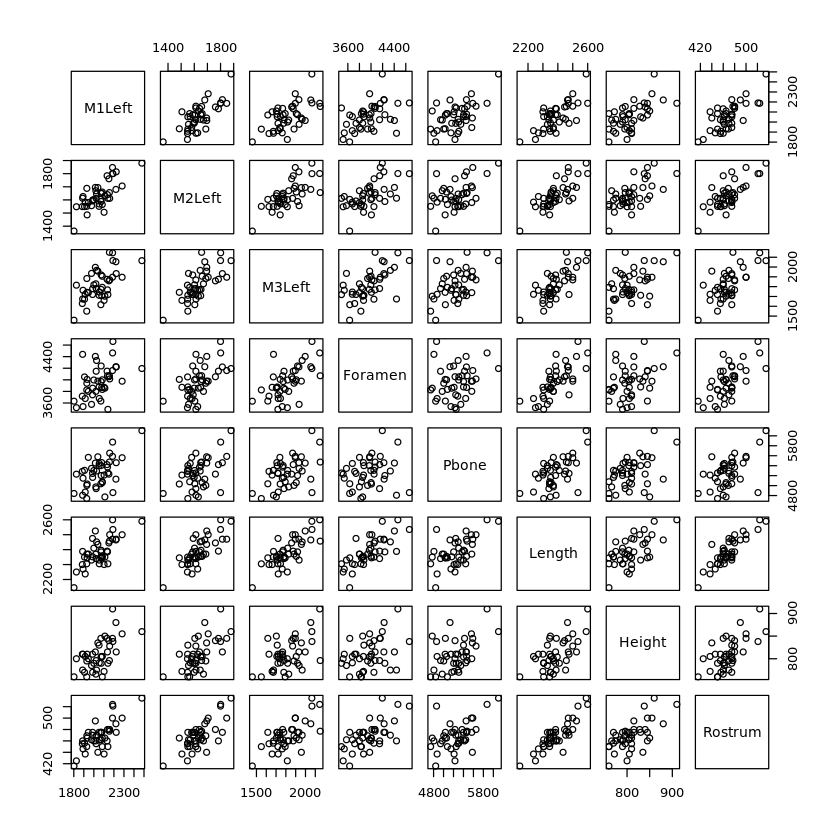

In [72]:
plot(mydata_aux)

In [78]:
X=cov(mydata_aux)
X

,M1Left,M2Left,M3Left,Foramen,Pbone,Length,Height,Rostrum
M1Left,17151.302,9741.079,12121.514,15875.971,21341.076,8843.298,2704.6866,2325.7370
M2Left,9741.079,10230.874,11037.057,16175.839,14254.686,7398.916,2178.4324,1784.1202
M3Left,12121.514,11037.057,23256.876,25092.821,22583.110,11035.022,2626.2220,2406.4308
Foramen,15875.971,16175.839,25092.821,73776.351,14841.824,18751.940,3293.5648,4222.4607
Pbone,21341.076,14254.686,22583.110,14841.824,85568.550,15987.815,4558.9291,3653.9219
Length,8843.298,7398.916,11035.022,18751.940,15987.815,8708.452,1921.8915,1936.4214
Height,2704.687,2178.432,2626.222,3293.565,4558.929,1921.891,1129.4906,528.5177
Rostrum,2325.737,1784.120,2406.431,4222.461,3653.922,1936.421,528.5177,574.4540


In [79]:
data_eig=eigen(X)
data_eig

eigen() decomposition
$values
[1] 130543.3745  65151.4737  12322.5257   7590.8072   2782.3721   1321.4963
[7]    571.8166    112.4838

$vectors
            [,1]         [,2]        [,3]        [,4]         [,5]        [,6]
[1,] -0.27194252  0.021933877  0.55712289  0.63803476 -0.436905789 -0.11912649
[2,] -0.21794558 -0.055878402  0.35770173  0.12947702  0.855590883 -0.24321773
[3,] -0.34085857 -0.086256332  0.50967692 -0.74951632 -0.215223867 -0.08948264
[4,] -0.54040024 -0.717411530 -0.40625641  0.08525146 -0.060333684 -0.12854214
[5,] -0.64040374  0.685416182 -0.33885737 -0.01080713  0.004555715 -0.07157841
[6,] -0.23279532 -0.065247680  0.11290268  0.03795177  0.120637493  0.92259087
[7,] -0.05625758  0.005313625  0.08754975  0.05711857  0.110029420  0.13221221
[8,] -0.05342729 -0.014007687  0.04015511  0.04780344  0.020867976  0.16836372
              [,7]         [,8]
[1,]  0.0427899204  0.034396878
[2,]  0.1160531832 -0.001880103
[3,] -0.0174256191 -0.014067663
[4,] -0.027704929

In [80]:
e_vec=data_eig$vectors
e_val=data_eig$values

In [85]:
data_red=t(e_vec[,1:2])%*%(t(mydata_aux)-apply(mydata_aux,2,mean))

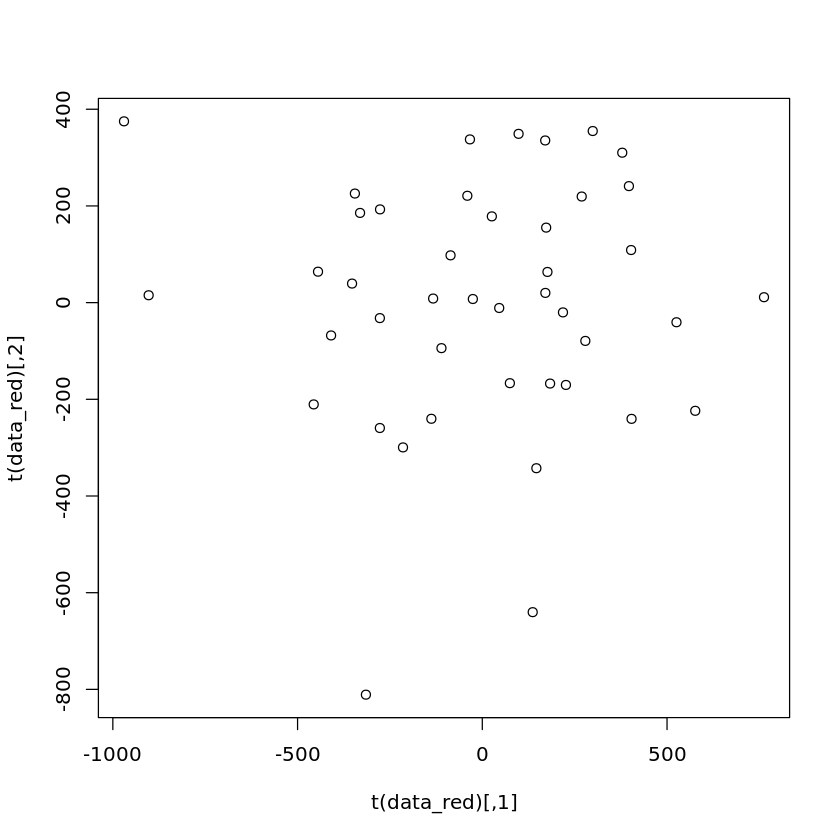

In [87]:
plot(t(data_red))

In [90]:
apply(mydata_aux,2,mean)

M1Left    M2Left    M3Left   Foramen     Pbone    Length    Height   Rostrum 
2054.5349 1636.4651 1819.9302 3966.4884 5260.2093 2385.9767  809.4419  468.6977

In [91]:
pot=sum(e_val)

In [97]:
e_val_norm=e_val/pot
e_val_norm

[1] 0.5923118714 0.2956104932 0.0559107520 0.0344416196 0.0126244019
[6] 0.0059959992 0.0025944923 0.0005103704

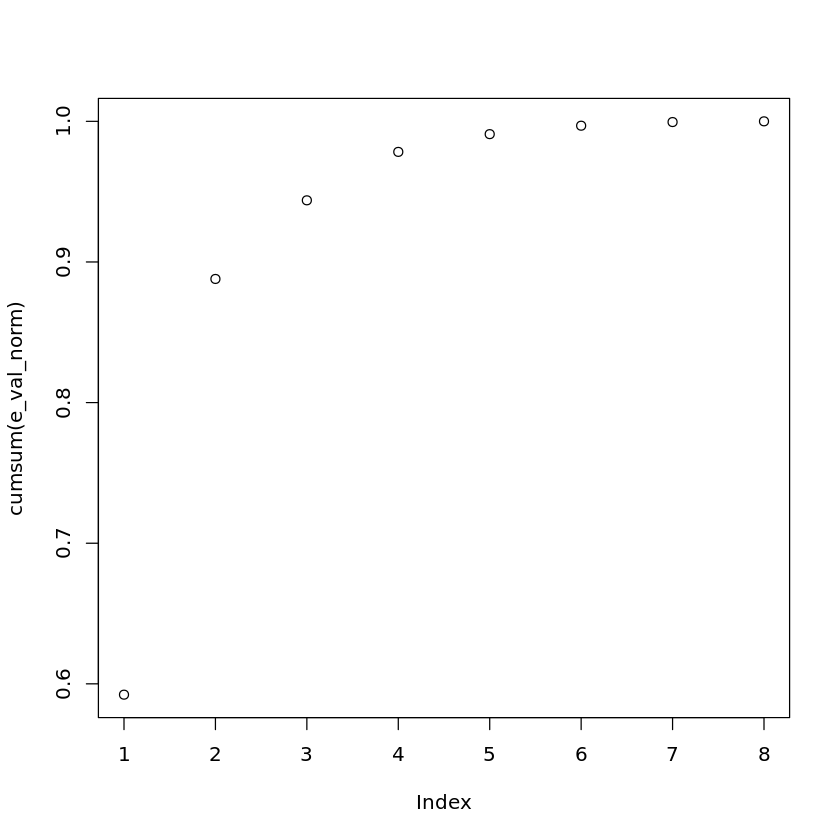

In [96]:
plot(cumsum(e_val_norm))